<h3>Train CCS Predicting Models, Predict CCS Values of Metabolites, Compare Them</h3>

<h4>Import Data</h4>

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [108]:
# Set plot fonts globally

mpl.rcParams['font.size'] = 14

mpl.rcParams['axes.titlesize'] = 16   # Title font size
mpl.rcParams['axes.labelsize'] = 14   # Axis label font size
mpl.rcParams['xtick.labelsize'] = 10  # X-axis tick label font size
mpl.rcParams['ytick.labelsize'] = 10  # Y-axis tick label font size
mpl.rcParams['legend.fontsize'] = 12  # Legend font size
mpl.rcParams['figure.titlesize'] = 18 # Figure title font size

In [2]:
ccs_df = pd.read_csv('/home/lbarbut/data/ccs/METLIN_IMS_all plot CV %3C2% _dimers.csv')
ccs_df

Molecule Name Molecular Formula  \
0      3-[3-(2,3-dihydroindol-1-yl)propyl]-1-[(4-fluo...        C19H22FN3O   
1      3-{[1,1'-biphenyl]-4-ylmethylidene}-6-fluoro-2...        C22H15FO3S   
2      1-{[3-(4-methoxyphenyl)-1,2,4-oxadiazol-5-yl]m...        C25H28N4O3   
3      3-[2-oxo-2-(4-phenylmethanesulfonylpiperazin-1...       C22H30N4O5S   
4      2-{[1,1'-biphenyl]-2-ylamino}-1-(morpholin-4-y...        C18H20N2O2   
...                                                  ...               ...   
65283                                                NaN               NaN   
65284                                                NaN               NaN   
65285                                                NaN               NaN   
65286                                                NaN               NaN   
65287                                                NaN               NaN   

       METLIN ID Precursor Adduct    CCS1    CCS2    CCS3  CCS_AVG  % CV  \
0      1181481.0    328.1820[M+H]  176.63  176.63  176.63   176.63   0.0   
1      1191359.0    379.0799[M+H]  192.26  192.26  192.26   192.26   0.0   
2      1228206.0    433.2234[M+H]  211.12  211.12  211.12   211.12   0.0   
3      1176932.0    463.2010[M+H]  204.22  204.22  204.22   204.22   0.0   
4      1183857.0    297.1598[M+H]  174.47  174.47  174.47   174.47   0.0   
...          ...              ...     ...     ...     ...      ...   ...   
65283        NaN              NaN     NaN     NaN     NaN      NaN   NaN   
65284        NaN              NaN     NaN     NaN     NaN      NaN   NaN   
65285        NaN              NaN     NaN     NaN     NaN      NaN   NaN   
65286        NaN              NaN     NaN     NaN     NaN      NaN   NaN   
65287        NaN              NaN     NaN     NaN     NaN      NaN   NaN   

            m/z  ...     m/z.1       Dimer  Dimer.1 dimer line    CCS  m/z.2  \
0      328.1820  ...  328.1820  209.886594  Monomer        NaN  135.0   50.0   
1      379.0799  ...  379.0799  223.588309  Monomer        NaN  310.0  700.0   
2      433.2234  ...  433.2234  238.163739  Monomer        NaN    NaN    NaN   
3      463.2010  ...  463.2010  246.233709  Monomer        NaN    NaN    NaN   
4      297.1598  ...  297.1598  201.535418  Monomer        NaN    NaN    NaN   
...         ...  ...       ...         ...      ...        ...    ...    ...   
65283       NaN  ...       NaN         NaN      NaN        NaN    NaN    NaN   
65284       NaN  ...       NaN         NaN     3825        NaN    NaN    NaN   
65285       NaN  ...       NaN         NaN    61457        NaN    NaN    NaN   
65286       NaN  ...       NaN         NaN      NaN        NaN    NaN    NaN   
65287       NaN  ...       NaN         NaN    65282        NaN    NaN    NaN   

        pubChem                                              inchi  \
0      25345055  InChI=1S/C19H22FN3O/c20-17-8-6-15(7-9-17)14-22...   
1           NaN  InChI=1S/C22H15FO3S/c23-19-10-11-21-20(13-19)2...   
2      17541371  InChI=1S/C25H28N4O3/c1-31-21-10-8-19(9-11-21)2...   
3      16295966  InChI=1S/C22H30N4O5S/c27-19(16-26-20(28)22(23-...   
4      17463671  InChI=1S/C18H20N2O2/c21-18(20-10-12-22-13-11-2...   
...         ...                                                ...   
65283        --                                                 --   
65284        --                                                 --   
65285        --                                                 --   
65286        --                                                 --   
65287        --                                                 --   

                                                  smiles  \
0                    O=C(NCc1ccc(cc1)F)NCCCN1CCc2c1cccc2   
1      Fc1ccc2c(c1)C(=O)C(=Cc1ccc(cc1)c1ccccc1)CS2(=O)=O   
2      COc1ccc(cc1)c1noc(n1)CN1CCN(CC1)C(=O)C1(CCC1)c...   
3      O=C(N1CCN(CC1)S(=O)(=O)Cc1ccccc1)CN1C(=O)NC2(C...   
4                        O=C(N1CCOCC1)CNc1ccccc1c1ccccc1   
...                            

Debug Mode

In [3]:
debug_mode = False
if debug_mode:
    # Shuffle, because all first 1000 rows have precursor [M+H]+
    ccs_df = ccs_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Keep only the first 1000 rows
    ccs_df = ccs_df.iloc[:1000]

    # Reset the index (optional)
    ccs_df = ccs_df.reset_index(drop=True)


<h4>Data Preprocessing</h4>

In [4]:
# drop NaN Precusor Adduct rows
ccs_df = ccs_df.dropna(subset=['Precursor Adduct'])

# remove the m/z number before the Precursor Adduct since the info is also in m/z column
ccs_df.loc[:, 'Precursor Adduct'] = ccs_df['Precursor Adduct'].str.replace(r'[0-9.]+', '', regex=True)

# remove [M+Na] rows
ccs_df = ccs_df[ccs_df['Precursor Adduct'] != '[M+Na]']

# change [M+H] to [M+H]+ and [M-H] to [M-H]-
ccs_df["Precursor Adduct"] = ccs_df["Precursor Adduct"].replace({
    "[M+H]": "[M+H]+",
    "[M-H]": "[M-H]-"
})

In [5]:
print(ccs_df['Precursor Adduct'].value_counts())

Precursor Adduct
[M+H]+    28136
[M-H]-    19697
Name: count, dtype: int64


In [6]:
from rdkit import Chem

In [7]:
def is_valid_smiles(smiles):
    try:
        return Chem.MolFromSmiles(smiles) is not None  # True if valid, False if invalid
    except Exception:
        return False


In [8]:

# Apply validation
ccs_df["smiles_is_valid"] = ccs_df["smiles"].apply(is_valid_smiles)

invalid_smiles = ccs_df.loc[~ccs_df["smiles_is_valid"], "smiles"]  # Select invalid SMILES
# print("Invalid SMILES strings:")
# print(invalid_smiles.tolist())

# Filter out invalid SMILES, afterwards drop the is_valid column
ccs_df = ccs_df[ccs_df["smiles_is_valid"]].drop(columns=["smiles_is_valid"]).reset_index(drop=True)

[14:55:53] SMILES Parse Error: syntax error while parsing: --
[14:55:53] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[14:55:53] SMILES Parse Error: syntax error while parsing: --
[14:55:53] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[14:55:53] SMILES Parse Error: syntax error while parsing: --
[14:55:53] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[14:55:53] SMILES Parse Error: syntax error while parsing: --
[14:55:53] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[14:55:53] SMILES Parse Error: syntax error while parsing: --
[14:55:53] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[14:55:53] SMILES Parse Error: syntax error while parsing: --
[14:55:53] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[14:55:53] SMILES Parse Error: syntax error while parsing: --
[14:55:53] SMILES Parse Error: Failed parsing SMILES '--' for input: '--'
[14:55:53] SMILES Parse Error: syntax error whil

In [9]:
# drop NaN CCS_AVG rows
ccs_df = ccs_df.dropna(subset=['CCS_AVG'])
ccs_df.shape

(44407, 21)

In [10]:
ccs_df["Instrument_type"] = "timsTOF"

In [11]:
ccs_df['CE'] = -1

<h4>Use Fiora To Predict CCS Values of Metabolites</h4>

In [12]:
# Create Metabolite column by Creating Molecular Graphs of Metabolites

from fiora.MOL.Metabolite import Metabolite
from fiora.GNN.AtomFeatureEncoder import AtomFeatureEncoder
from fiora.GNN.BondFeatureEncoder import BondFeatureEncoder
from fiora.GNN.SetupFeatureEncoder import SetupFeatureEncoder

CE_upper_limit = 100.0
weight_upper_limit = 1000.0

ccs_df["Metabolite"] = ccs_df["smiles"].apply(Metabolite)
ccs_df["Metabolite"].apply(lambda x: x.create_molecular_structure_graph())

node_encoder = AtomFeatureEncoder(feature_list=["symbol", "num_hydrogen", "ring_type"])
bond_encoder = BondFeatureEncoder(feature_list=["bond_type", "ring_type"])
setup_encoder = SetupFeatureEncoder(feature_list=["collision_energy", "molecular_weight", "precursor_mode", "instrument"])
rt_encoder = SetupFeatureEncoder(feature_list=["molecular_weight", "precursor_mode", "instrument"])

setup_encoder.normalize_features["collision_energy"]["max"] = CE_upper_limit 
setup_encoder.normalize_features["molecular_weight"]["max"] = weight_upper_limit 
rt_encoder.normalize_features["molecular_weight"]["max"] = weight_upper_limit 

ccs_df["Metabolite"].apply(lambda x: x.compute_graph_attributes(node_encoder, bond_encoder))

[14:56:00] WARNING: not removing hydrogen atom without neighbors
[14:56:00] WARNING: not removing hydrogen atom without neighbors
[14:56:00] WARNING: not removing hydrogen atom without neighbors
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] WARNING: Omitted undefined stereo

[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGenerator
[14:56:01] DEPRECATION WARNING: please use MorganGe

0        None
1        None
2        None
3        None
4        None
         ... 
44402    None
44403    None
44404    None
44405    None
44406    None
Name: Metabolite, Length: 44407, dtype: object

In [13]:
# Assign unique Metabolite identifiers
print("Unique smiles: " + str(len(ccs_df["smiles"].unique())))

metabolite_id_map = {}
for metabolite in ccs_df["Metabolite"]:
    is_new = True
    for id, other in metabolite_id_map.items():
        if metabolite == other:
            metabolite.set_id(id)
            is_new = False
            break
    if is_new:
        new_id = len(metabolite_id_map)
        metabolite.id = new_id
        metabolite_id_map[new_id] = metabolite

ccs_df["group_id"] = ccs_df["Metabolite"].apply(lambda x: x.get_id())
ccs_df["num_per_group"] = ccs_df["group_id"].map(ccs_df["group_id"].value_counts())

for i, data in ccs_df.iterrows():
    data["Metabolite"].set_loss_weight(1.0 / data["num_per_group"])
ccs_df["loss_weight"] = ccs_df["Metabolite"].apply(lambda x: x.loss_weight)

def print_df_stats(df):
    num_spectra = df.shape[0]
    num_ids = len(df["group_id"].unique())
    
    print(f"Dataframe stats: {num_spectra} spectra covering {num_ids} unique structures")

print_df_stats(ccs_df)

Unique smiles: 27334


Dataframe stats: 44407 spectra covering 27326 unique structures


In [14]:
ccs_df.apply(lambda x: x["Metabolite"].set_id(x["group_id"]), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
44402    None
44403    None
44404    None
44405    None
44406    None
Length: 44407, dtype: object

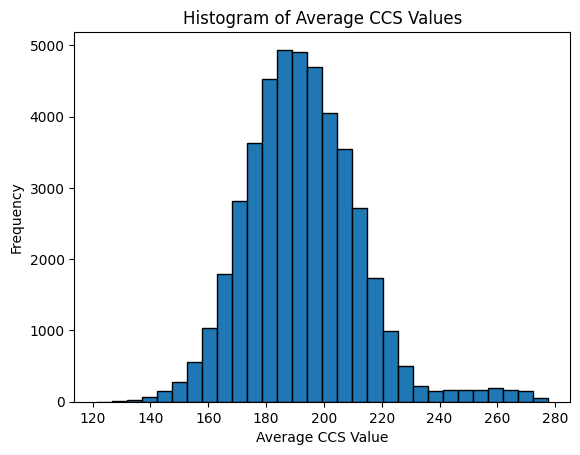

In [15]:
# Plot histogram of CCS_AVG column

plt.hist(ccs_df['CCS_AVG'], bins=30, edgecolor='black')
plt.xlabel('Average CCS Value')
plt.ylabel('Frequency')
plt.title('Histogram of Average CCS Values')
plt.show()

<h5>Predict CCS Values</h5>

In [16]:
import json
from fiora.GNN.GNNModules import GNNCompiler
from fiora.MS.SimulationFramework import SimulationFramework

In [17]:
# Load best model

dev="cuda:1"
#MODEL_PATH = f"{home}/data/metabolites/pretrained_models/pre_package/v0.0.1_merged_depth6_Jan24.pt"
MODEL_PATH = "/home/lbarbut/models/ccs_models/v0.0.1_merged_depth6_Aug24_sqrt+CCS+RT_drop3.pt" # New sqrt model (improved)

try:
    model = GNNCompiler.load_from_state_dict(MODEL_PATH)
    print("Model loaded from state dict without errors.")
except:
    raise NameError("Error: Failed loading from state dict.")
        

model.eval()
model = model.to(dev)

model.model_params

spectral_modules = ["node_embedding", "edge_embedding", "GNN_module", "edge_module", "precursor_module", "RT_module"]
for module in spectral_modules:
    model.freeze_submodule(module)

for name, param in model.named_parameters():
    if param.requires_grad:print(f"{name}: requires gradients")

Model loaded from state dict without errors.
CCS_module.dense_layers.0.weight: requires gradients
CCS_module.dense_layers.0.bias: requires gradients
CCS_module.dense_layers.1.weight: requires gradients
CCS_module.dense_layers.1.bias: requires gradients
CCS_module.output_layer.weight: requires gradients
CCS_module.output_layer.bias: requires gradients


In [18]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: requires gradients")
    # else:
    #     print(f"{name}: does not require gradients (frozen)")

CCS_module.dense_layers.0.weight: requires gradients
CCS_module.dense_layers.0.bias: requires gradients
CCS_module.dense_layers.1.weight: requires gradients
CCS_module.dense_layers.1.bias: requires gradients
CCS_module.output_layer.weight: requires gradients
CCS_module.output_layer.bias: requires gradients


<h5>Include Metadata</h5>

In [19]:
ccs_df["Metabolite"][0]

<Metabolite: O=C(NCc1ccc(cc1)F)NCCCN1CCc2c1cccc2>

In [20]:
metadata_key = { "collision_energy":  "CE", 
                 "instrument": "Instrument_type",
                 "precursor_mz": "m/z", 
                 'precursor_mode': "Precursor Adduct",
                 "ccs": "CCS_AVG"
                 }

ccs_df["summary"] = ccs_df.apply(lambda x: {key: x[name] for key, name in metadata_key.items()}, axis=1)
ccs_df.apply(lambda x: x["Metabolite"].add_metadata(x["summary"], setup_encoder, rt_encoder), axis=1)
ccs_df.apply(lambda x: x["Metabolite"].set_loss_weight(x["loss_weight"]), axis=1)
ccs_df.apply(lambda x: x["Metabolite"].set_precursor_positive(x["Precursor Adduct"]), axis=1)

ccs_df["geo_data"] = ccs_df["Metabolite"].apply(lambda x: x.as_geometric_data(with_labels=False, ccs_only=True).to(dev)).values

In [21]:
ccs_df["summary"][0]

{'collision_energy': -1,
 'instrument': 'timsTOF',
 'precursor_mz': 328.182,
 'precursor_mode': '[M+H]+',
 'ccs': 176.63,
 'molecular_weight': 327.174690544}

In [22]:
weights = [item.weight for item in ccs_df["geo_data"]]

ccs_df["weights"] = weights



In [23]:
ccs_df["Precursor Adduct"]

0        [M+H]+
1        [M+H]+
2        [M+H]+
3        [M+H]+
4        [M+H]+
          ...  
44402    [M-H]-
44403    [M-H]-
44404    [M-H]-
44405    [M-H]-
44406    [M-H]-
Name: Precursor Adduct, Length: 44407, dtype: object

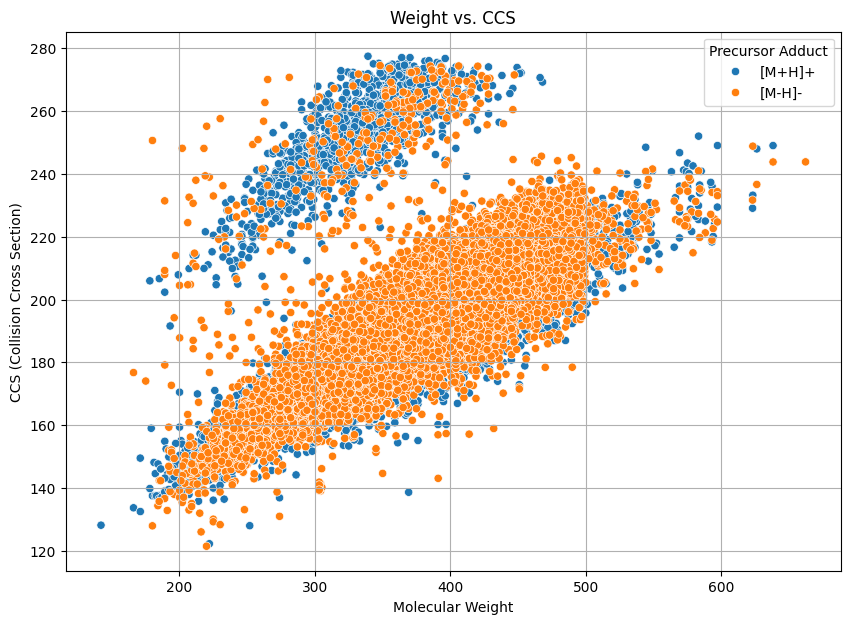

In [24]:
import torch
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=ccs_df, x='weights', y='CCS_AVG', hue='Precursor Adduct', palette='tab10'
)
plt.xlabel("Molecular Weight")
plt.ylabel("CCS (Collision Cross Section)")
plt.title("Weight vs. CCS")
plt.grid(True)
plt.show()


In [25]:
filtered_df = ccs_df[abs(ccs_df['weights'] - ccs_df['CCS_AVG']) <= 100].copy()

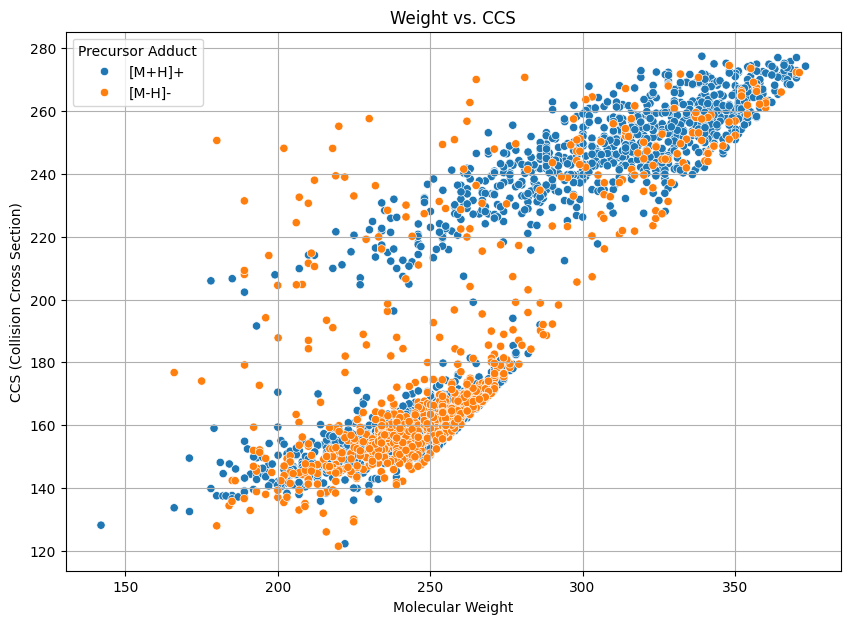

In [26]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=filtered_df, x='weights', y='CCS_AVG', hue='Precursor Adduct', palette='tab10'
)
plt.xlabel("Molecular Weight")
plt.ylabel("CCS (Collision Cross Section)")
plt.title("Weight vs. CCS")
plt.grid(True)
plt.show()

In [27]:
filtered_df.columns

Index(['Molecule Name', 'Molecular Formula', 'METLIN ID', 'Precursor Adduct',
       'CCS1', 'CCS2', 'CCS3', 'CCS_AVG', '% CV', 'm/z', 'Adduct', 'm/z.1',
       'Dimer', 'Dimer.1', 'dimer line', 'CCS', 'm/z.2', 'pubChem', 'inchi',
       'smiles', 'InChIKEY', 'Instrument_type', 'CE', 'Metabolite', 'group_id',
       'num_per_group', 'loss_weight', 'summary', 'geo_data', 'weights'],
      dtype='object')

<h5>Prediction</h5>

In [28]:
fiora = SimulationFramework(None, dev=dev, with_RT=True, with_CCS=True)
fiora.pred_all(ccs_df, model)


In [29]:
ccs_df['CCS_pred'] = ccs_df["Metabolite"].apply(lambda x: x.CCS_pred)

In [30]:
ccs_df['CCS_pred']

0        tensor(191.9466, device='cuda:1')
1        tensor(191.9459, device='cuda:1')
2        tensor(208.1397, device='cuda:1')
3        tensor(213.6994, device='cuda:1')
4        tensor(171.2999, device='cuda:1')
                       ...                
44402    tensor(176.8240, device='cuda:1')
44403    tensor(176.7797, device='cuda:1')
44404    tensor(202.7449, device='cuda:1')
44405    tensor(192.2687, device='cuda:1')
44406    tensor(188.1292, device='cuda:1')
Name: CCS_pred, Length: 44407, dtype: object

Measure MSE of predicted and experimental values

In [31]:
mse = 0

mse = ((ccs_df['CCS_AVG'] - ccs_df['CCS_pred'].apply(lambda x: x.item()))**2).mean()
print(mse)


253.72799476627156


Plot Experimental CCS vs. Predicted CCS

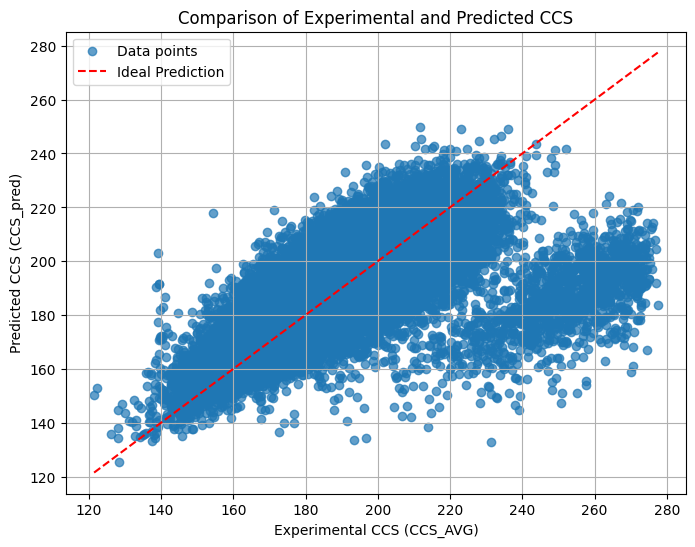

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(ccs_df['CCS_AVG'], ccs_df['CCS_pred'].apply(lambda x: x.item()), alpha=0.7, label="Data points") #alpha:transparency
plt.plot([ccs_df['CCS_AVG'].min(), ccs_df['CCS_AVG'].max()],
         [ccs_df['CCS_AVG'].min(), ccs_df['CCS_AVG'].max()],
         color='red', linestyle='--', label="Ideal Prediction")

plt.xlabel("Experimental CCS (CCS_AVG)")
plt.ylabel("Predicted CCS (CCS_pred)")
plt.title("Comparison of Experimental and Predicted CCS")
plt.legend()
plt.grid()
plt.show()

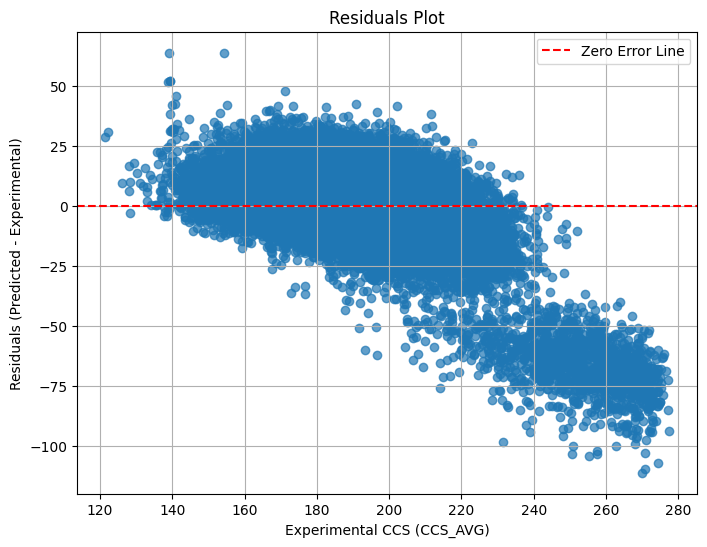

In [33]:
plt.figure(figsize=(8, 6))
residuals = ccs_df['CCS_pred'].apply(lambda x: x.item()) - ccs_df['CCS_AVG']
plt.scatter(ccs_df['CCS_AVG'], residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label="Zero Error Line")

plt.xlabel("Experimental CCS (CCS_AVG)")
plt.ylabel("Residuals (Predicted - Experimental)")
plt.title("Residuals Plot")
plt.legend()
plt.grid()
plt.show()

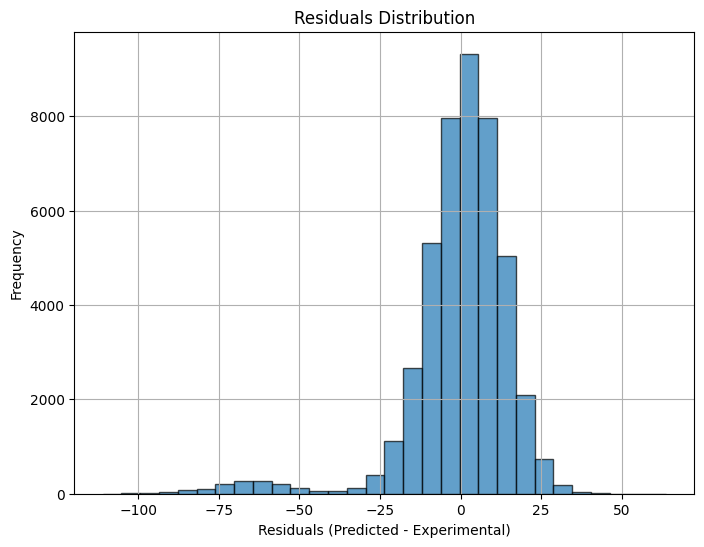

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')

plt.xlabel("Residuals (Predicted - Experimental)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.grid()
plt.show()

In [35]:
from sklearn.metrics import r2_score

# Berechnung des R²-Werts
r2 = r2_score(ccs_df['CCS_AVG'], ccs_df['CCS_pred'].apply(lambda x: x.item()))
print(f"R²-Wert: {r2}")

R²-Wert: 0.3529058749641605


In [36]:
ccs_df['error'] = (ccs_df['CCS_AVG'] - ccs_df['CCS_pred'].apply(lambda x: x.item())).abs()

# 100 biggest deviation
largest_errors_df = ccs_df.nlargest(100, 'error')
print("Größte Abweichungen:")
print(largest_errors_df[['CCS_AVG', 'CCS_pred', 'error']])

Größte Abweichungen:
       CCS_AVG                           CCS_pred       error
36656   270.05  tensor(158.9468, device='cuda:1')  111.103192
36608   270.69  tensor(161.2299, device='cuda:1')  109.460081
38889   274.48  tensor(167.1784, device='cuda:1')  107.301564
32956   255.17  tensor(150.8709, device='cuda:1')  104.299089
32336   257.59  tensor(154.0916, device='cuda:1')  103.498371
...        ...                                ...         ...
13340   246.72  tensor(163.4458, device='cuda:1')   83.274214
37774   257.49  tensor(174.2220, device='cuda:1')   83.268015
39892   274.06  tensor(190.8424, device='cuda:1')   83.217639
36922   272.35  tensor(189.1557, device='cuda:1')   83.194330
1558    264.20  tensor(181.1316, device='cuda:1')   83.068439

[100 rows x 3 columns]


In [37]:
# not a very interpretable plot

import seaborn as sns

# ccs_pred_values = largest_errors_df['CCS_pred'].apply(lambda x: x.item())

# plt.figure(figsize=(10, 6))

# # Scatter plot of the CCS_AVG vs. CCS_pred
# sns.scatterplot(data=largest_errors_df, x='CCS_AVG', y=ccs_pred_values)
# plt.plot([largest_errors_df['CCS_AVG'].min(), largest_errors_df['CCS_AVG'].max()],
#          [largest_errors_df['CCS_AVG'].min(), largest_errors_df['CCS_AVG'].max()],
#          color='red', linestyle='--', label="Ideal Prediction (y = x)")
# # Titles and labels
# plt.title("100 Biggest Errors Between CCS_AVG and CCS_pred")
# plt.xlabel("CCS_AVG")
# plt.ylabel("CCS_pred")
# plt.legend()
# plt.grid()

plt.show()

In [38]:
# R² for M+H and M-H seperately
if not debug_mode:
    for mode in ['[M+H]+', '[M-H]-']:
        mode_df = ccs_df[ccs_df['Precursor Adduct'] == mode]
        r2_mode = r2_score(mode_df['CCS_AVG'], mode_df['CCS_pred'].apply(lambda x: x.item()))
        print(f"R² for {mode}: {r2_mode}")

R² for [M+H]+: 0.2967642730964015
R² for [M-H]-: 0.44106203484617634


Split Train/Test/Validation Data

In [39]:
from sklearn.model_selection import train_test_split

seed = 42

def train_val_test_split(keys, test_size=0.1, val_size=0.1, rseed=seed):
    temp_keys, test_keys = train_test_split(keys, test_size=test_size, random_state=rseed)
    adjusted_val_size = val_size / (1 - test_size)
    train_keys, val_keys = train_test_split(temp_keys, test_size=adjusted_val_size, random_state=rseed)
    
    return train_keys, val_keys, test_keys

group_ids = ccs_df["group_id"].astype(int)
keys = np.unique(group_ids)
example_not_in_test_split = True

train, val, test = train_val_test_split(keys, rseed=seed)
ccs_df["datasplit"] = ccs_df["group_id"].apply(lambda x: 'train' if x in train else 'validation' if x in val else 'test' if x in test else 'VALUE ERROR')


In [40]:
test_df = ccs_df[ccs_df['datasplit'] == 'test']

In [41]:
train_df = ccs_df[ccs_df['datasplit'] == 'train']

In [42]:
if not debug_mode:
    for mode in ['[M+H]+', '[M-H]-']:
        mode_df = test_df[test_df['Precursor Adduct'] == mode]
        r2_mode = r2_score(mode_df['CCS_AVG'], mode_df['CCS_pred'].apply(lambda x: x.item()))
        print(f"R² for {mode} (Test Set): {r2_mode}")

R² for [M+H]+ (Test Set): 0.31436410178876073
R² for [M-H]- (Test Set): 0.45076351850588925


/tmp/ipykernel_1280259/2330683015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['carbon_ratios'] = test_df["Metabolite"].apply(lambda x: x.element_distribution['C'])
/tmp/ipykernel_1280259/2330683015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["carbon_bin"] = pd.cut(test_df["carbon_ratios"], bins=10)


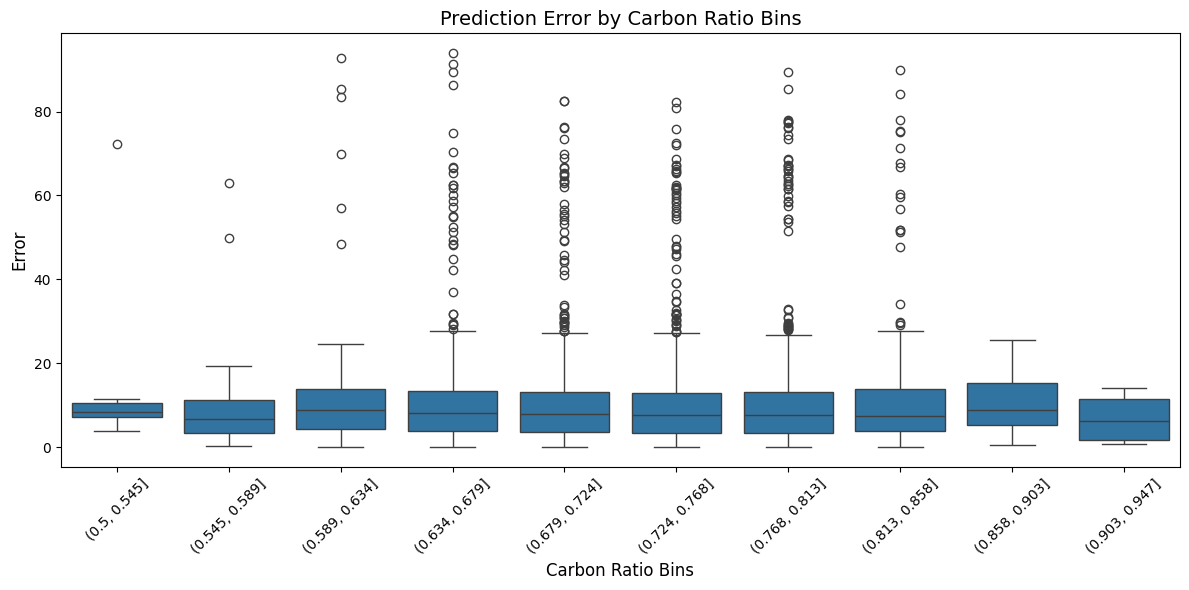

In [43]:
# Plot Error Compared to Carbon-Ratio

test_df['carbon_ratios'] = test_df["Metabolite"].apply(lambda x: x.element_distribution['C'])

test_df["carbon_bin"] = pd.cut(test_df["carbon_ratios"], bins=10)

plt.figure(figsize=(12, 6))
sns.boxplot(data=test_df, x="carbon_bin", y="error")
plt.title("Prediction Error by Carbon Ratio Bins", fontsize=14)
plt.xlabel("Carbon Ratio Bins", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [44]:
import fiora.MOL.constants

def is_element_included(element, metabolite):    # element as symbol
    if element in metabolite.node_elements:
        return True
    else:
        return False

def rare_element_included(metabolite):
    rare_elements = fiora.MOL.constants.RARE_ELEMENTS
    included = False
    for element in rare_elements:
        included = included or is_element_included(element, metabolite)
    return included


In [45]:
# check if there is any difference in rare_element_included ratios between filtered_df vs. ccs_df
ccs_df['rare_element_included'] = ccs_df["Metabolite"].apply(lambda x : rare_element_included(x))
filtered_df['rare_element_included'] = filtered_df["Metabolite"].apply(lambda x : rare_element_included(x))

# Calculate the ratio of True values in each DataFrame
ccs_rare_ratio = ccs_df['rare_element_included'].mean()
filtered_rare_ratio = filtered_df['rare_element_included'].mean()

print(f"Ratio of rare element included in full dataset: {ccs_rare_ratio:.4f}")
print(f"Ratio of rare element included in filtered dataset: {filtered_rare_ratio:.4f}")

ccs_df['carbon_ratios'] = ccs_df["Metabolite"].apply(lambda x: x.element_distribution['C'])
filtered_df['carbon_ratios'] = filtered_df["Metabolite"].apply(lambda x: x.element_distribution['C'])

ccs_carbon_ratio = ccs_df['carbon_ratios'].mean()
filtered_carbon_ratio = filtered_df['carbon_ratios'].mean()

print(f"Ratio of carbon in full dataset: {ccs_carbon_ratio:.4f}")
print(f"Ratio of carbon in filtered dataset: {filtered_carbon_ratio:.4f}")


Ratio of rare element included in full dataset: 0.3229
Ratio of rare element included in filtered dataset: 0.2057
Ratio of carbon in full dataset: 0.7338
Ratio of carbon in filtered dataset: 0.7435


/tmp/ipykernel_1280259/2538906055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['I_included'] = test_df["Metabolite"].apply(lambda x : is_element_included('I', x))


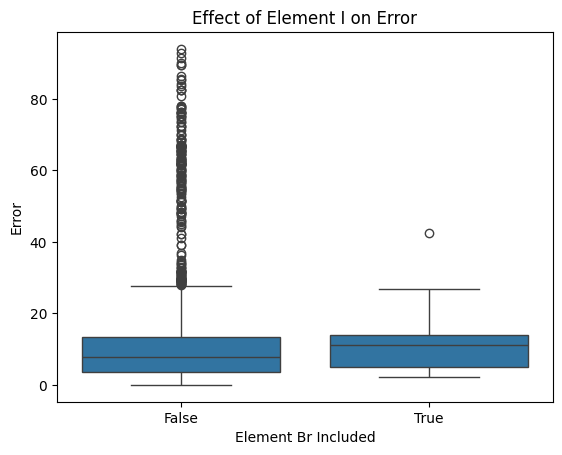

In [46]:
# Plot Error Depending on Iod Existence

test_df['I_included'] = test_df["Metabolite"].apply(lambda x : is_element_included('I', x))

sns.boxplot(data=test_df, x='I_included', y='error')
plt.xlabel("Element Br Included")
plt.ylabel("Error")
plt.title("Effect of Element I on Error")
plt.show()

Classify Metabolites Based on Murcko Scaffold and Evaluate the Error Rates Depending on These Classes

In [47]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

def get_murcko_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        return Chem.MolToSmiles(scaffold)
    return None

/tmp/ipykernel_1280259/3133248743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['scaffold'] = test_df['smiles'].apply(lambda x: get_murcko_scaffold(x))
/tmp/ipykernel_1280259/3133248743.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['scaffold'] = test_df['scaffold'].apply(
/tmp/ipykernel_1280259/3133248743.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

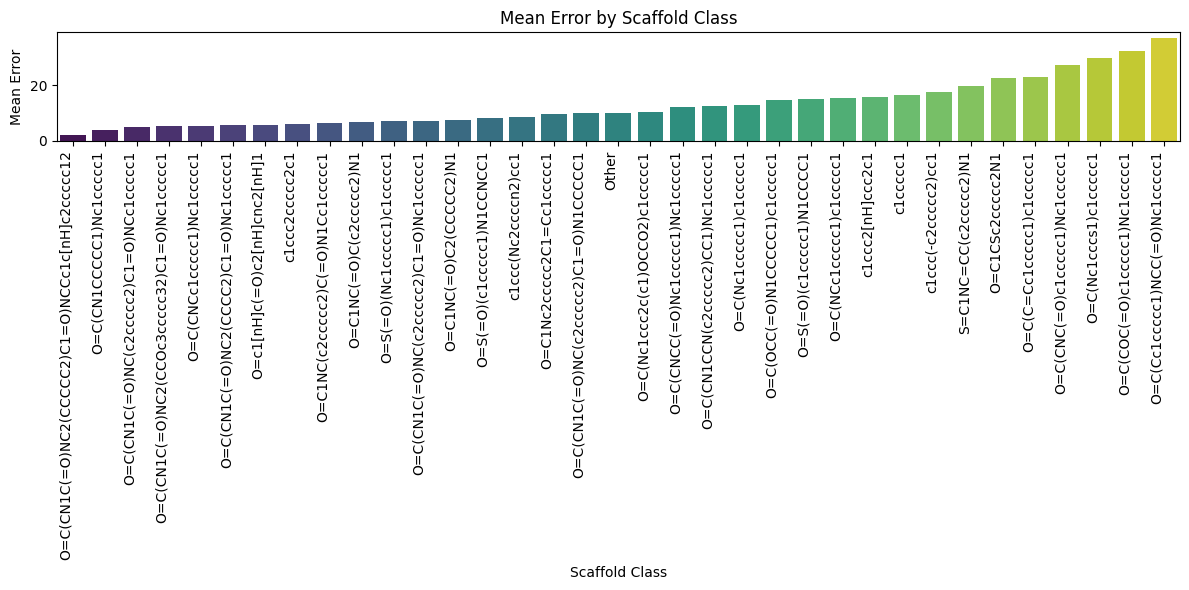

In [48]:
# create scaffold column, group by scaffold, calculate mean error for each scaffold class

test_df['scaffold'] = test_df['smiles'].apply(lambda x: get_murcko_scaffold(x))
scaffold_counts = test_df['scaffold'].value_counts()

# Define a threshold for grouping rare scaffolds
threshold = 5

# Replace rare scaffolds with 'Other'
test_df['scaffold'] = test_df['scaffold'].apply(
    lambda x: x if scaffold_counts[x] > threshold else 'Other'
)

grouped_data = test_df.groupby('scaffold')['error'].mean().reset_index()

grouped_data = grouped_data.sort_values(by='error')

# plot error for each scaffold class
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='scaffold', y='error', palette="viridis")

plt.title("Mean Error by Scaffold Class")
plt.xlabel("Scaffold Class")
plt.ylabel("Mean Error")
plt.xticks(rotation=90, ha='right')  # rotate x-axis labels if there are many scaffolds
plt.tight_layout()
plt.show()

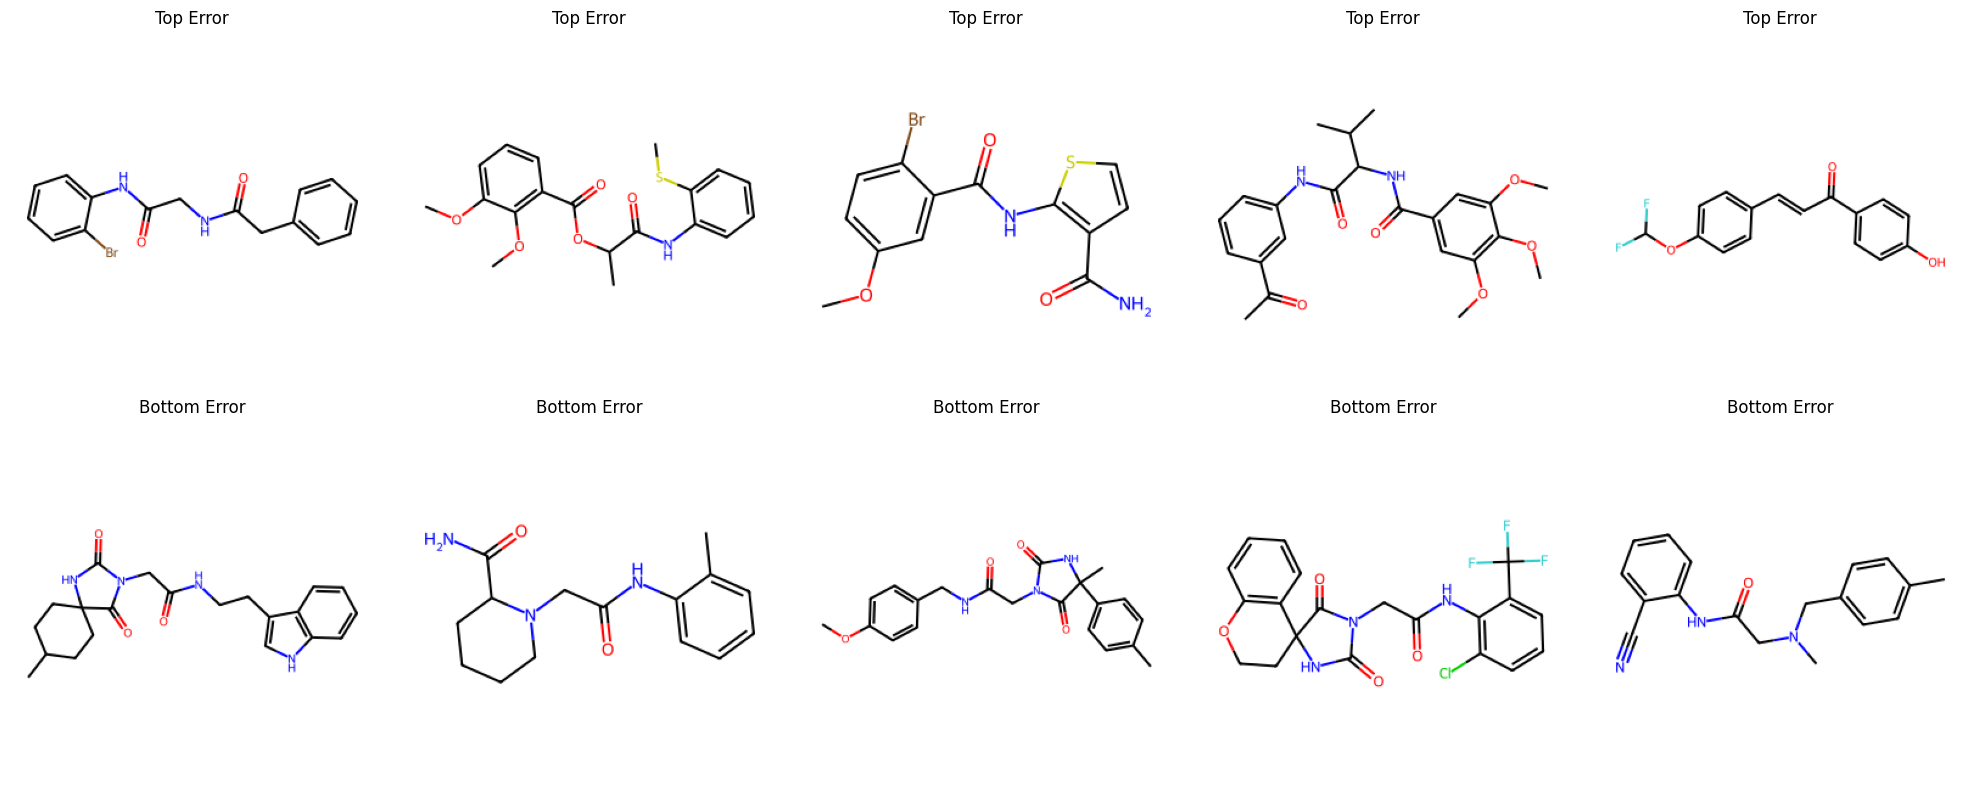

In [49]:
from rdkit.Chem import Draw

if not debug_mode:
    # Get the top 5 scaffolds with the highest and lowest errors
    top_5_scaffolds = grouped_data.nlargest(5, 'error')['scaffold']
    bottom_5_scaffolds = grouped_data.nsmallest(5, 'error')['scaffold']

    scaffolds_to_plot = pd.concat([top_5_scaffolds, bottom_5_scaffolds])

    # Create a new DataFrame with the corresponding SMILES for top and bottom scaffolds
    top_bottom_scaffolds = test_df[test_df['scaffold'].isin(scaffolds_to_plot)]

    molecule_images = []

    # Create a molecule image for each scaffold in the top 5 and bottom 5
    for scaffold in scaffolds_to_plot:
        scaffold_smiles = top_bottom_scaffolds[top_bottom_scaffolds['scaffold'] == scaffold]['smiles'].iloc[0]
        mol = Chem.MolFromSmiles(scaffold_smiles)
        img = Draw.MolToImage(mol)
        molecule_images.append(img)

    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    for i, ax in enumerate(axes.flatten()):
        if i < 5:
            ax.set_title("Top Error")  # Set title for top 5
        else:
            ax.set_title("Bottom Error")  # Set title for bottom 5
        ax.imshow(molecule_images[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1280259/2821679205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['rare_element_included'] = test_df["Metabolite"].apply(lambda x : rare_element_included(x))


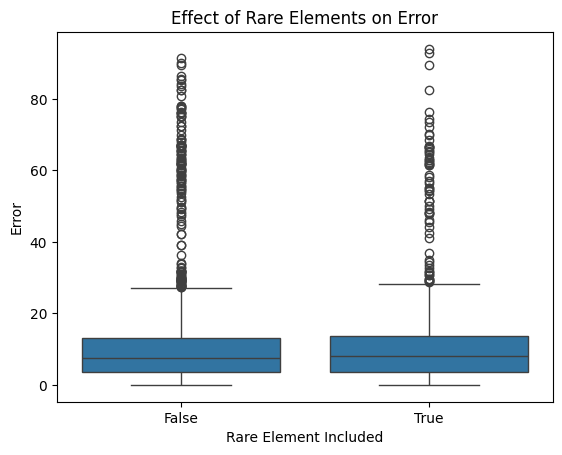

In [50]:
# Plot Error Depending on Rare Element Existence

test_df['rare_element_included'] = test_df["Metabolite"].apply(lambda x : rare_element_included(x))

sns.boxplot(data=test_df, x='rare_element_included', y='error')
plt.xlabel("Rare Element Included")
plt.ylabel("Error")
plt.title("Effect of Rare Elements on Error")
plt.show()

In [51]:
# import torch
# from fiora.GNN.Trainer import Trainer

In [52]:
# loss_fn = torch.nn.MSELoss() 

# rt_epochs = 500 # 300
# rt_batch = 64 #128
# rt_lr = 0.005

# def train_rt_model(rt_lr=rt_lr, rt_batch=rt_batch, rt_epochs=rt_epochs):        
#     y_label = 'compiled_probsALL'
#     optimizer = torch.optim.Adam(model.parameters(), lr=rt_lr)
#     train_keys, val_keys = ccs_df[ccs_df["dataset"] == "training"]["group_id"].unique(), ccs_df[ccs_df["dataset"] == "validation"]["group_id"].unique()
#     trainer = Trainer(geo_data, y_tag=y_label, problem_type="regression", train_keys=train_keys, val_keys=val_keys, metric_dict=None, split_by_group=True, seed=seed, device=dev)
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience = 8, factor=0.8, mode = 'min', verbose = True)
#     checkpoints = trainer.train(model, optimizer, loss_fn, scheduler=scheduler, batch_size=rt_batch, epochs=rt_epochs, val_every_n_epochs=1, with_CCS=True, with_RT=True, rt_metric=True, masked_validation=False, tag=tag) #, mask_name="compiled_validation_maskALL")   

#     return model, checkpoints

In [53]:
# model.set_dropout_rate(input_dropout=0.5, latent_dropout=0.5)

# model, cp = train_rt_model()

In [54]:
datasplit_value_counts = ccs_df['datasplit'].value_counts()
print(datasplit_value_counts)

datasplit
train         35572
validation     4446
test           4389
Name: count, dtype: int64


In [55]:
ccs_df['carbon_ratio'] = ccs_df['Metabolite'].apply(lambda x: x.element_distribution['C'] / len(x.node_elements))

<h4>Class PropertyTrainer</h4>

In [56]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch_geometric.loader as geom_loader
from torchmetrics import Accuracy, MetricTracker, MetricCollection, Precision, Recall, PrecisionRecallCurve, MeanSquaredError, MeanAbsoluteError, R2Score, PearsonCorrCoef
from sklearn.model_selection import train_test_split
from typing import Literal, List, Callable, Any, Dict

from fiora.GNN.Trainer import Trainer
from fiora.GNN.Datasets import collate_graph_batch, collate_graph_edge_batch
from fiora.GNN.Losses import WeightedMSELoss, WeightedMAELoss

In [57]:
class PropertyTrainer(Trainer):
    def __init__(self, data: Any, train_val_split: float= 0.8, split_by_group: bool=False, only_training: bool=False, train_keys: List[int]=[], val_keys: List[int]=[], test_keys: List[int]=[], y_tag: str="y", metric_dict: Dict=None, problem_type: Literal["classification", "regression", "softmax_regression"]="classification", library: Literal["standard", "geometric"]="geometric", num_workers: int=0, seed: int=42, device: str="cpu"):
        
        super().__init__(data, train_val_split, split_by_group, only_training, train_keys, val_keys, test_keys, seed, num_workers, device)
        self.y_tag = y_tag
        self.problem_type = problem_type

        self.data = data 
         
        # Initialize torch metrics based on dictionary 
        if metric_dict:
            self.metrics = {
                data_split: MetricTracker(MetricCollection({
                        t: M() for t,M in metric_dict.items()       # t: metric name, M() corresponding metric class instance (e.g. torchmetrics.R2Score())
                    })).to(device)
                for data_split in ["train", "val", "test"]
            }
        else:
            self.metrics = self._get_default_metrics(problem_type)
        self.loader_base = geom_loader.DataLoader if library == "geometric" else DataLoader
    
    def _training_loop(self, model, dataloader, optimizer, loss_fn, metrics, property: str="ccs", with_weights=False, with_RT=False, with_CCS=True, rt_metric=False, title=""):
        metrics.increment()   

        for batch in dataloader: # enumerate  
            # print(batch)
            # Feed forward
            batch = batch.to("cuda:1")

            model.train() # training mode
            
            y_pred = model(batch)

            target = batch[property]#.to(torch.float32)
            #target = target.view(-1, 1)
            #target = target.to("cuda:1")

            # print("Predicted shape:", y_pred[property].shape)
            # print("Target shape:", target.shape)

            loss = loss_fn(y_pred[property], target)  

            # Backpropagate
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()        

    def _validation_loop(self, model, dataloader, loss_fn, metrics, with_weights=False, with_RT=False,  with_CCS=True, property: str="ccs", rt_metric=False, title="Validation"):
        metrics.increment()
        with torch.no_grad():
            for batch in dataloader:
                model.eval()
                y_pred = model(batch) # with_CCS = True
                loss = loss_fn(y_pred[property], batch[property])
                    
                metrics(y_pred[property], batch[property]) # call update                      

        # End of Validation cycle
        stats = metrics.compute()
        print(f'\t{title} RMSE: {torch.sqrt(stats["mse"]):>.4f}')
        return stats
    
    def _test_loop(self, model, dataloader, loss_fn, metrics, property: str="ccs", rt_metric=False):
        metrics.increment()
        all_preds = []
        all_targets = []

        with torch.no_grad():
            for batch in dataloader:
                model.eval()
                y_pred = model(batch)  # Forward pass
                loss = loss_fn(y_pred[property], batch[property])

                metrics(y_pred[property], batch[property])  # Call update on metrics

                all_preds.append(y_pred[property].cpu())
                all_targets.append(batch[property].cpu())

        # End of Test cycle
        stats = metrics.compute()
        # print(f'\tTest RMSE: {torch.sqrt(stats["mse"]):>.4f}')

        stats["predictions"] = torch.cat(all_preds).numpy()
        stats["targets"] = torch.cat(all_targets).numpy()

        for stat in stats:
            stat_name = stat.upper()
            if stat_name == "MSE":
                print(f'\tTest RMSE: {torch.sqrt(stats["mse"]):>.4f}')
            elif stat_name in ["PREDICTIONS", "TARGETS"]:
                continue
            else:
                print(f"\tTest {stat_name}: {stats[stat]:.4f}")
        
        return stats
        
    # Training function
    def train(self, model, optimizer, loss_fn, scheduler=None, batch_size=16, epochs=2, val_every_n_epochs=1, with_RT=True, with_CCS=True, rt_metric=False, tag="") -> Dict[str, Any]:
        
        # Set up checkpoint system and model info
        self._init_checkpoint_system(save_path=f"../../checkpoint_{tag}.best.pt")
        model.model_params["training_label"] = self.y_tag
        
        # Stage data into dataloader
        training_loader = self.loader_base(self.data, batch_size=batch_size, num_workers=self.num_workers, shuffle=True)
        if not self.only_training:
            validation_loader = self.loader_base(self.validation_data, batch_size=batch_size, num_workers=self.num_workers, shuffle=True)
        using_weighted_loss_func = isinstance(loss_fn, WeightedMSELoss) | isinstance(loss_fn, WeightedMAELoss)
        
        # Main loop
        for e in range(epochs):
            # Training
            self._training_loop(model, training_loader, optimizer, loss_fn, self.metrics["train"], title=f'Epoch {e + 1}/{epochs}: ', with_weights=using_weighted_loss_func, with_RT=with_RT, with_CCS=with_CCS, rt_metric=rt_metric)
            # Validation
            is_val_cycle = not self.only_training and ((e + 1) % val_every_n_epochs == 0)
            if is_val_cycle:   
                val_stats = self._validation_loop(model, validation_loader, loss_fn, self.metrics["val"], with_weights=using_weighted_loss_func, with_RT=with_RT, with_CCS=with_CCS, rt_metric=rt_metric,  title="Validation")
                
                # Update checkpoint
                if val_stats["mse"].tolist() < self.checkpoint_stats["val_loss"]:
                    self._update_checkpoint({"epoch": e+1, "val_loss": val_stats["mse"].tolist()}, model)
                    print(f"\t >> Set new checkpoint to epoch {e+1}")
            
            # End of epoch: Advance scheduler
            if scheduler:
                if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                    if is_val_cycle:
                        scheduler.step(torch.sqrt(val_stats["mse"]))
                else:
                    scheduler.step()
                    
        print("Finished Training!")
        return self.checkpoint_stats

    def test(self, model, loss_fn, batch_size=16, tag="") -> Dict[str, Any]:
        """
        Test the trained model on the test dataset and compute the RMSE.
        """
        if model is None:
            raise ValueError("Model is None. Ensure the model is correctly initialized and passed.")

        # Stage test data into dataloader
        test_loader = self.loader_base(self.test_data, batch_size=batch_size, num_workers=self.num_workers, shuffle=False)

        # Test loop
        print(f"Testing model: {tag}")
        test_stats = self._test_loop(model, test_loader, loss_fn, self.metrics["test"])

        # welches Molekül? visualisieren
        
        # test_stats = {
        #     "ground truth": test_data
        #     "prediction": y_pred
        # }
        return test_stats
    

In [58]:
# from torch_geometric.data import Dataset

# class CCSGeometricDataset(Dataset):
#     def __init__(self, data, targets, group_ids, datasplit):
#         super().__init__()
#         self.data = data  # List of graph data objects
#         self.targets = targets  # Corresponding target values (ccs_avg)
#         self.group_ids = group_ids
#         self.datasplit = datasplit

#     def len(self):
#         return len(self.data)

#     def get(self, idx):
#         graph = self.data[idx]  # PyTorch Geometric graph object
#         target = self.targets[idx]  # Associated target value
#         group_ids = self.group_ids[idx]
#         datasplit = self.datasplit[idx]
#         graph['ccs'] = target  # Add target as an attribute in the graph
#         graph['group_ids'] = group_ids
#         graph['datasplit'] = datasplit
#         return graph

In [59]:
# Extract data and targets
# ccs_targets = ccs_df['CCS_AVG'].values
# group_ids = ccs_df['group_id'].values
# datasplit_values = ccs_df['datasplit'].values

# # Create dataset
# ccs_dataset = CCSGeometricDataset(data=geo_data, targets=ccs_targets, group_ids=group_ids, datasplit=datasplit_values)

# # Create a boolean mask to index the dataset
# train_mask = ccs_df['datasplit'] == "train"
# val_mask = ccs_df['datasplit'] == "validation"

# # Index using boolean arrays
# train_data = ccs_dataset[train_mask.to_numpy()]
# val_data = ccs_dataset[val_mask.to_numpy()]

# Create DataLoaders
# train_loader = geom_loader.DataLoader(train_data, batch_size=16, shuffle=True)
# val_loader = geom_loader.DataLoader(val_data, batch_size=16, shuffle=False)

In [60]:
geo_data = ccs_df['geo_data'].values

In [61]:
# geo_data = torch.tensor(geo_data, dtype=torch.float32).to("cuda:1")

In [62]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_keys, val_keys, test_keys = ccs_df[ccs_df["datasplit"] == "train"]["group_id"].unique(), ccs_df[ccs_df["datasplit"] == "validation"]["group_id"].unique(), ccs_df[ccs_df["datasplit"] == "test"]["group_id"].unique()

trainer_fiora = PropertyTrainer(
    data=geo_data,
    y_tag='ccs',
    problem_type="regression",
    train_keys=train_keys,
    val_keys=val_keys,
    test_keys=test_keys,
    metric_dict=None,
    split_by_group=True,
    device="cuda:1"
)

# Train the model
checkpoint = trainer_fiora.train(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=30,
    val_every_n_epochs=1,
    with_CCS=True,
    tag="fiora"
)

Using pre-set train/validation/test keys


/home/lbarbut/anaconda3/envs/fiora/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: FutureWarning: The default value for `maximize` will be changed from `True` to `None` in v1.7.0 of TorchMetrics,will automatically infer the value based on the `higher_is_better` attribute of the metric (if such attribute exists) or raise an error if it does not. If you are explicitly setting the `maximize` argument to either `True` or `False` already, you can ignore this warning.
  warnings.warn(*args, **kwargs)  # noqa: B028


	Validation RMSE: 14.6266
	 >> Set new checkpoint to epoch 1
	Validation RMSE: 14.8999
	Validation RMSE: 14.2251
	 >> Set new checkpoint to epoch 3
	Validation RMSE: 13.0627
	 >> Set new checkpoint to epoch 4
	Validation RMSE: 12.8137
	 >> Set new checkpoint to epoch 5
	Validation RMSE: 12.4303
	 >> Set new checkpoint to epoch 6
	Validation RMSE: 12.2398
	 >> Set new checkpoint to epoch 7
	Validation RMSE: 12.2290
	 >> Set new checkpoint to epoch 8
	Validation RMSE: 12.8372
	Validation RMSE: 12.5961
	Validation RMSE: 12.5481
	Validation RMSE: 11.7867
	 >> Set new checkpoint to epoch 12
	Validation RMSE: 11.5849
	 >> Set new checkpoint to epoch 13
	Validation RMSE: 11.2816
	 >> Set new checkpoint to epoch 14
	Validation RMSE: 11.6102
	Validation RMSE: 11.3076
	Validation RMSE: 11.5092
	Validation RMSE: 13.8941
	Validation RMSE: 10.5841
	 >> Set new checkpoint to epoch 19
	Validation RMSE: 10.9384
	Validation RMSE: 11.1915
	Validation RMSE: 10.4423
	 >> Set new checkpoint to epoch 22
	Va

In [63]:
# DO THIS TO LOAD MODEL AND TEST THAT MODEL
# ALSO FOR DIFFERENT MODELS

model = model.load(checkpoint["file"])

In [64]:
print(geo_data[0].x)  # Assuming geo_data contains PyTorch Geometric Data objects


tensor([[6, 0, 0],
        [1, 0, 0],
        [5, 1, 0],
        [1, 2, 0],
        [1, 0, 3],
        [1, 1, 3],
        [1, 1, 3],
        [1, 0, 3],
        [1, 1, 3],
        [1, 1, 3],
        [3, 0, 0],
        [5, 1, 0],
        [1, 2, 0],
        [1, 2, 0],
        [1, 2, 0],
        [5, 0, 2],
        [1, 2, 2],
        [1, 2, 2],
        [1, 0, 3],
        [1, 0, 3],
        [1, 1, 3],
        [1, 1, 3],
        [1, 1, 3],
        [1, 1, 3]], device='cuda:1', dtype=torch.int32)


<h4>Linear Model</h4>

In [65]:
import torch.nn as nn

In [66]:
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)  # Xavier Initialization
        nn.init.zeros_(m.bias)  # Initialize bias to zero

In [67]:
# Simple linear model
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.activation = nn.ReLU()

        # Include model parameters as required by PropertyTrainer
        self.model_params = {
            "training_label": None, # changed to 'ccs' through y_tag in PropertyTrainer
            "input_dim": input_dim,
            "output_dim": output_dim,
        }

    def forward(self, batch):
        # Handle dictionary-style batches
        # print(batch)
        if isinstance(batch, dict):
            x = batch.get("data")
            # print(f"X: {x}")
        # Handle PyTorch Geometric-style batches
        elif hasattr(batch, "weight") and hasattr(batch, "precursor_positive"):
            # x = batch.weight.unsqueeze(-1)
            weight = batch.weight.unsqueeze(-1)
            precursor_positive = batch.precursor_positive.unsqueeze(-1).float()
            # x = batch.weight
            # x = x.unsqueeze(0).transpose(0,1)
            # x = batch.static_graph_features
            # print(f"X: {x}")

        else:
            raise KeyError("Batch does not contain the required 'data' or 'weight' & 'precursor_positive' attributes.")

        # Ensure tensors are on the correct device
        weight = weight.to(dev)
        precursor_positive = precursor_positive.to(dev)

        # Concatenate weight and precursor_positive as input
        x = torch.cat((weight, precursor_positive), dim=-1)


        # Ensure the input is a float tensor
        x = x.to(dev)#to(torch.float32).to("cuda:1")
        #print(next())

        #print(next(self.parameters()).device)

        # Forward pass through the linear layer -> ReLU Activation
        output = self.linear(x) #self.activation(self.linear(x))
        # print(output)

        # print("Training batch example:", batch["weight"])
        # print("Training target example:", batch["ccs"])


        # Return predictions as a dictionary with key 'ccs' (default property in PropertyTrainer)
        return {"ccs": output}

    def save(self, filepath):
        """Save the model to the given filepath."""
        # GNNCompiler.save(filepath)
        # print(f"State Dict: {self.state_dict()}")
        torch.save(self.state_dict(), filepath)
        print(f"Model saved to {filepath}")

    def load(self, filepath):
        """Load the model's state from a given filepath."""
        # Load the state dictionary from the saved checkpoint
        # GNNCompiler.load(PATH=filepath)
        self.load_state_dict(torch.load(filepath, map_location="cpu")) # cuda:1 / cpu
        print(f"Model loaded from {filepath}")
        
# Instantiate the model
input_dim = 2 #9
output_dim = 1
linear_model = LinearModel(input_dim, output_dim).to("cuda:1")

#linear_model.apply(initialize_weights)

optimizer_linear = torch.optim.Adam(linear_model.parameters(), lr=0.001)

# for param in linear_model.parameters():
#     print(param)

trainer_linear = PropertyTrainer(
    data=geo_data,
    y_tag="ccs",
    problem_type="regression",
    train_keys=train_keys,
    val_keys=val_keys,
    test_keys=test_keys,
    metric_dict=None,
    split_by_group=True,
    device="cuda:1",
    library="geometric"
)

# Train the model
# linear_model = linear_model.to("cuda:1")
linear_checkpoint = trainer_linear.train(
    model=linear_model,
    optimizer=optimizer_linear,
    loss_fn=loss_fn,
    epochs=30,
    val_every_n_epochs=1,
    with_CCS=True,
    tag="linear"
)

Using pre-set train/validation/test keys


	Validation RMSE: 24.8558
Model saved to ../../checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 1
	Validation RMSE: 24.7144
Model saved to ../../checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 2
	Validation RMSE: 24.4818
Model saved to ../../checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 3
	Validation RMSE: 24.2761
Model saved to ../../checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 4
	Validation RMSE: 24.0699
Model saved to ../../checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 5
	Validation RMSE: 23.9882
Model saved to ../../checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 6
	Validation RMSE: 23.6648
Model saved to ../../checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 7
	Validation RMSE: 23.5139
Model saved to ../../checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 8
	Validation RMSE: 23.3367
Model saved to ../../checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 9
	Validation RMSE: 23.1509
Mo

In [68]:
import torch_geometric as geom
optimizer_linear = torch.optim.Adam(linear_model.parameters(), lr=0.001)
y_pred = linear_model(geom.data.Batch.from_data_list(geo_data[0:5]))
loss = loss_fn(y_pred["ccs"], geom.data.Batch.from_data_list(geo_data[0:5])["ccs"])  

In [69]:
optimizer_linear.zero_grad()
loss.backward()
optimizer_linear.step()

In [70]:
y_pred["ccs"]

tensor([[172.5303],
        [192.9160],
        [214.6017],
        [226.6083],
        [160.1053]], device='cuda:1', grad_fn=<AddmmBackward0>)

In [71]:
geom.data.Batch.from_data_list(geo_data[0:5])["ccs"]

tensor([[176.6300],
        [192.2600],
        [211.1200],
        [204.2200],
        [174.4700]], device='cuda:1')

In [72]:
# import os

# filepath = linear_checkpoint["file"]
# print(f"Checkpoint path: {filepath}")
# print(f"File exists: {os.path.exists(filepath)}")
# print(f"File size: {os.path.getsize(filepath) if os.path.exists(filepath) else 'N/A'} bytes")


In [73]:
# linear_model.save('../../checkpoint_test.pt')
# lin_model_test = linear_model.load('../../checkpoint_test.pt')

# print(lin_model_test)

In [74]:
# Load Linear Model from checkpoint

linear_model.load(linear_checkpoint["file"])

# In Debug Mode
# RuntimeError: Invalid magic number; corrupt file?
# .pt file size: 19809568 bytes

# Not In Debug Mode
# No error, linear_model = None
# .pt file size: 1600 bytes

Model loaded from ../../checkpoint_linear.best.pt


/tmp/ipykernel_1280259/3511392393.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(filepath, map_location="cpu")) # cuda:1 / cpu


In [75]:
print(linear_model)


LinearModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (activation): ReLU()
)


<h4>MLP Model</h4>

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class MLPModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLPModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),  # First hidden layer with 32 neurons
            nn.ReLU(),
            nn.Linear(32, 16),         # Second hidden layer with 16 neurons
            nn.ReLU(),
            nn.Linear(16, output_dim)  # Output layer
        )

        # Include model parameters as required by PropertyTrainer
        self.model_params = {
            "training_label": None, # changed to 'ccs' through y_tag in PropertyTrainer
            "input_dim": input_dim,
            "output_dim": output_dim,
        }

    def forward(self, batch):
        if isinstance(batch, dict):
            x = batch.get("data")
        elif hasattr(batch, "weight") and hasattr(batch, "precursor_positive"):
            # x = batch.weight.unsqueeze(-1)
            weight = batch.weight.unsqueeze(-1)
            precursor_positive = batch.precursor_positive.unsqueeze(-1).float()
        else:
            raise KeyError("Batch does not contain 'data' or 'weight' & 'precursor_positive' attributes.")
        
        weight = weight.to(dev)
        precursor_positive = precursor_positive.to(dev)

        x = torch.cat((weight, precursor_positive), dim=-1)

        x = x.to(dev)

        return {"ccs": self.layers(x)}

    def save(self, filepath):
        torch.save(self.state_dict(), filepath)
        print(f"Model saved to {filepath}")

    def load(self, filepath):
        self.load_state_dict(torch.load(filepath, map_location="cpu")) # cuda:1 / cpu
        print(f"Model loaded from {filepath}")

# Instantiate Model
input_dim = 2
output_dim = 1  
mlp_model = MLPModel(input_dim, output_dim).to("cuda:1")

# print(f"MLP Model: {mlp_model}")

optimizer_mlp = torch.optim.Adam(mlp_model.parameters(), lr=0.001)

trainer_mlp = PropertyTrainer(
    data=geo_data,
    y_tag="ccs",
    problem_type="regression",
    train_keys=train_keys,
    val_keys=val_keys,
    test_keys=test_keys,
    metric_dict=None,
    split_by_group=True,
    device="cuda:1",
    library="geometric"
)

# Train the model
mlp_checkpoint = trainer_mlp.train(
    model=mlp_model,
    optimizer=optimizer_mlp,
    loss_fn=loss_fn,
    epochs=30,
    val_every_n_epochs=1,
    with_CCS=True,
    tag="mlp"
)


Using pre-set train/validation/test keys


/home/lbarbut/anaconda3/envs/fiora/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: FutureWarning: The default value for `maximize` will be changed from `True` to `None` in v1.7.0 of TorchMetrics,will automatically infer the value based on the `higher_is_better` attribute of the metric (if such attribute exists) or raise an error if it does not. If you are explicitly setting the `maximize` argument to either `True` or `False` already, you can ignore this warning.
  warnings.warn(*args, **kwargs)  # noqa: B028


	Validation RMSE: 24.6961
Model saved to ../../checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 1
	Validation RMSE: 23.7095
Model saved to ../../checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 2
	Validation RMSE: 21.7236
Model saved to ../../checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 3
	Validation RMSE: 18.5702
Model saved to ../../checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 4
	Validation RMSE: 15.7447
Model saved to ../../checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 5
	Validation RMSE: 16.2333
	Validation RMSE: 15.4486
Model saved to ../../checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 7
	Validation RMSE: 15.9973
	Validation RMSE: 15.4448
Model saved to ../../checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 9
	Validation RMSE: 15.4135
Model saved to ../../checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 10
	Validation RMSE: 16.6471
	Validation RMSE: 15.4760
	Validation RMSE: 16.2569
	Validation RMSE: 15.4227
	Va

In [89]:
# mlp_model = mlp_model.load(mlp_checkpoint["file"])
# print(f"MLP Model: {mlp_model}")

# filepath = mlp_checkpoint["file"]
# print(f"Checkpoint path: {filepath}")
# print(f"File exists: {os.path.exists(filepath)}")
# print(f"File size: {os.path.getsize(filepath) if os.path.exists(filepath) else 'N/A'} bytes")

In [90]:
print(mlp_checkpoint)

{'epoch': 26, 'val_loss': 236.7084503173828, 'file': '../../checkpoint_mlp.best.pt'}


In [91]:
# Load MLP Model from checkpoint

mlp_model.load(mlp_checkpoint["file"])

print(mlp_model)

Model loaded from ../../checkpoint_mlp.best.pt
MLPModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)


/tmp/ipykernel_1280259/3137378941.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(filepath, map_location="cpu")) # cuda:1 / cpu


In [92]:
# Load Fiora Model from checkpoint

model.load(checkpoint["file"])  # model = fiora_model
print(model)
# filepath = checkpoint["file"]
# print(f"Checkpoint path: {filepath}")
# print(f"File exists: {os.path.exists(filepath)}")
# print(f"File size: {os.path.getsize(filepath) if os.path.exists(filepath) else 'N/A'} bytes")

GNNCompiler(
  (node_embedding): FeatureEmbedding(
    (embeddings): ModuleList(
      (0): Embedding(10, 100)
      (1-2): 2 x Embedding(5, 100)
    )
  )
  (edge_embedding): FeatureEmbedding(
    (embeddings): ModuleList(
      (0): Embedding(4, 150)
      (1): Embedding(5, 150)
    )
  )
  (GNN_module): GNN(
    (activation): ELU(alpha=1.0)
    (input_dropout): Dropout(p=0.2, inplace=False)
    (latent_dropout): Dropout(p=0.1, inplace=False)
    (graph_layers): ModuleList(
      (0-5): 6 x RGCNConv(300, 300, num_relations=4)
    )
  )
  (edge_module): EdgePredictor(
    (activation): ELU(alpha=1.0)
    (input_dropout): Dropout(p=0.2, inplace=False)
    (latent_dropout): Dropout(p=0.1, inplace=False)
    (dense_layers): ModuleList(
      (0-1): 2 x Linear(in_features=909, out_features=909, bias=True)
    )
    (output_layer): Linear(in_features=909, out_features=10, bias=True)
  )
  (precursor_module): GraphPredictor(
    (activation): ELU(alpha=1.0)
    (input_dropout): Dropout(p=0.

<h3>Test</h3>

In [93]:
# test_stats_linear = trainer.test(model=linear_model, loss_fn=loss_fn, batch_size=16, tag="linear_model")
# print(f"Test RMSE: {torch.sqrt(test_stats_linear['mse']):>.4f}")

In [94]:
# Fiora Model Test

fiora_model = model.to('cuda:1')

# Residual-Werte, plotten

test_stats_fiora = trainer_fiora.test(fiora_model, loss_fn, 16, "fiora_test")
# print(f"Test MSE: {(test_stats_fiora['mse']):>.4f}")

test_stats_linear = trainer_linear.test(linear_model, loss_fn, 16, "linear_test")

test_stats_mlp = trainer_mlp.test(mlp_model, loss_fn, 16, "mlp_test")

Testing model: fiora_test


	Test MAE: 5.8280
	Test RMSE: 9.6202
	Test PEARSON: 0.8796
	Test R2: 0.7725
Testing model: linear_test
	Test MAE: 13.5772
	Test RMSE: 19.9891
	Test PEARSON: 0.6752
	Test R2: 0.0177
Testing model: mlp_test
	Test MAE: 8.8318
	Test RMSE: 14.8624
	Test PEARSON: 0.6784
	Test R2: 0.4570


<h4>Visualization of Test Results</h4>

In [95]:
# Find global min and max for consistent axes
all_targets = np.concatenate([test_stats_fiora["targets"], test_stats_linear["targets"], test_stats_mlp["targets"]])
all_predictions = np.concatenate([test_stats_fiora["predictions"], test_stats_linear["predictions"], test_stats_mlp["predictions"]])

global_min = min(all_targets.min(), all_predictions.min())
global_max = max(all_targets.max(), all_predictions.max())

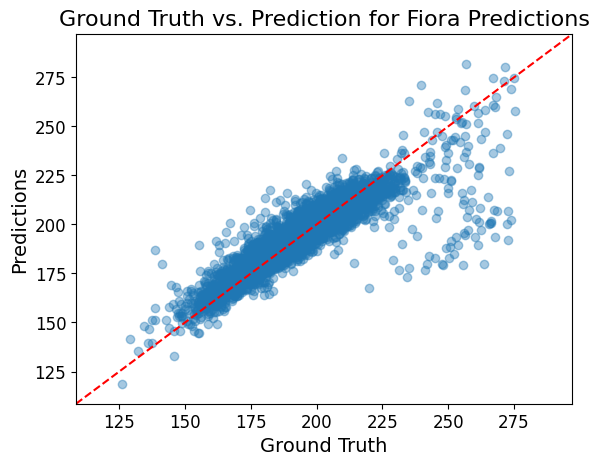

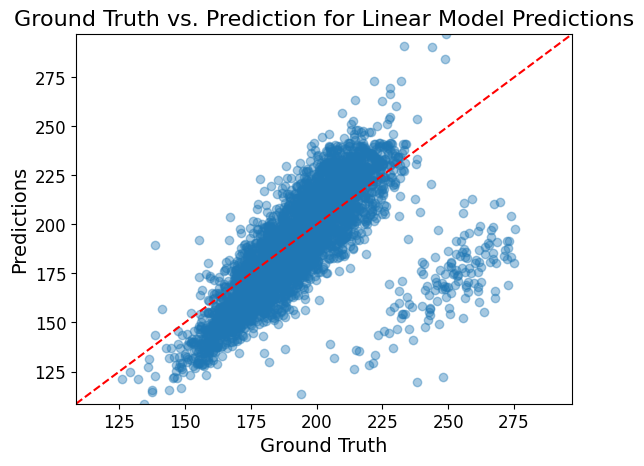

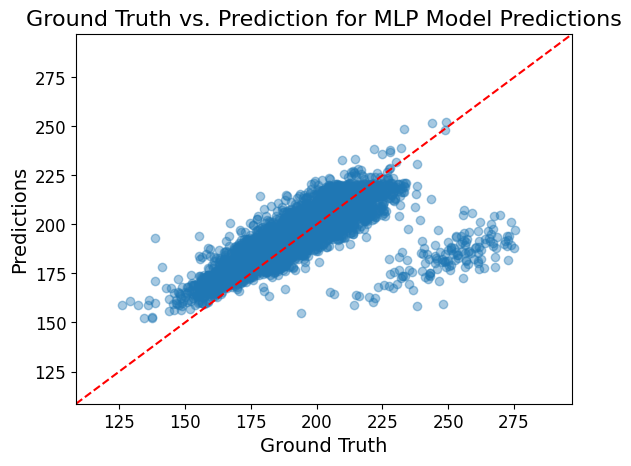

In [109]:
# Fiora Ground Truth vs. Prediction

plt.scatter(test_stats_fiora["targets"], test_stats_fiora["predictions"], alpha=0.4)
plt.plot([global_min, global_max], [global_min, global_max], 'r--')
plt.xlim(global_min, global_max)
plt.ylim(global_min, global_max)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Ground Truth vs. Prediction for Fiora Predictions")
plt.show()

# Linear Model Ground Truth vs. Prediction

plt.scatter(test_stats_linear["targets"], test_stats_linear["predictions"], alpha=0.4)
plt.plot([global_min, global_max], [global_min, global_max], 'r--')
plt.xlim(global_min, global_max)
plt.ylim(global_min, global_max)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Ground Truth vs. Prediction for Linear Model Predictions")
plt.show()

# MLP Ground Truth vs. Prediction

plt.scatter(test_stats_mlp["targets"], test_stats_mlp["predictions"], alpha=0.4)
plt.plot([global_min, global_max], [global_min, global_max], 'r--')
plt.xlim(global_min, global_max)
plt.ylim(global_min, global_max)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Ground Truth vs. Prediction for MLP Model Predictions")
plt.show()

In [97]:
# Test Stats Comparison of Models, Barplot

def compare_models_barplot(model_names, test_stats, metric): # give model_name and test_stats as arrays with the correct order
    metric = metric.lower()

    if not all(metric in stat for stat in test_stats) and metric != "rmse":
        raise ValueError(f"Metric '{metric}' not found in test stats dictionaries.")

    if metric == 'rmse':
        scores = [stat['mse'].cpu().numpy() for stat in test_stats]  # loops test stat dictionaries and extracts the input metric
        scores = np.sqrt(scores)
    else:
        scores = [stat[metric].cpu().numpy() for stat in test_stats]

    plt.figure(figsize=(8, 6))
    plt.bar(model_names, scores, color=['blue', 'orange', 'green']) 

    plt.xlabel("Models")
    plt.ylabel(metric.upper())
    plt.title(f"Model Comparison: {metric.upper()}")

    plt.show()


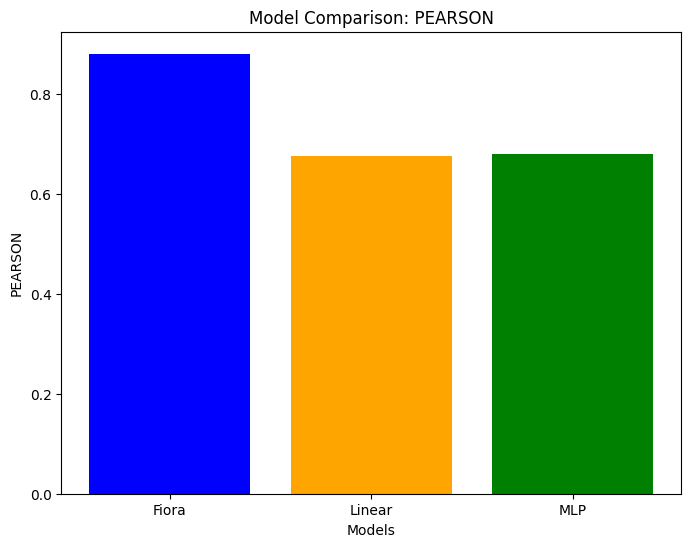

In [98]:
compare_models_barplot(["Fiora", "Linear", "MLP"], [test_stats_fiora, test_stats_linear, test_stats_mlp], "pearson")

In [99]:
# One Molecule Example